In [35]:
import pandas
train_data = pandas.DataFrame.from_csv("train.csv")
test_data = pandas.DataFrame.from_csv("test.csv")

In [36]:
import numpy as np


In [37]:
a=np.array([0,2,4,6])
a=a+[1]
print(a)
for i,x in enumerate(a):
    print(i,x)
c=-3

print(abs(c))

[1 3 5 7]
(0, 1)
(1, 3)
(2, 5)
(3, 7)
3


In [38]:
def get_std(X,Y, model):
    score = np.sqrt(sum((model.predict(X)-Y)**2)*1.0/len(Y))
    return score

In [39]:
def clean_data_after_model(X,Y, model):
    import numpy as np
#     import sys
    std3=get_std(X,Y,model)*3
#     print (std3)
    YP=model.predict(X)
    Ynew=np.array([],dtype='float64')
    Xnew=[]
#     Xnew=np.array([],dtype='float64')
    for index,item in enumerate(Y):
#         print(abs(item-YP[index]))
        if (abs(item-YP[index]))<std3:
#             sys.stdout.write(str(item))
#             sys.stdout.write(' ;')
            Ynew = np.append(Ynew, item)
            Xnew.append(np.array(X[index]))
#             Xnew = np.append(Xnew, np.array(X[index]),axis=0)
        else:
            continue
    Xnew = np.array(Xnew,dtype='float64')
    print(Xnew.shape, Ynew.shape)
    return Xnew, Ynew
            
            

In [40]:
def clean_data(X,Y):
    import numpy as np
    std3=Y.std()*3
    ymean=Y.mean()
    Ynew=np.array([],dtype='float64')
    Xnew=[]  
    for index,item in enumerate(Y):
        if (item>(ymean-std3)) and (item<(ymean+std3)) :
            Ynew = np.append(Ynew, item)
            Xnew.append(np.array(X[index]))
        else:
            continue
    Xnew = np.array(Xnew,dtype='float64')
    print(Xnew.shape, Ynew.shape)
    return Xnew, Ynew
    


In [41]:
X=np.array(train_data, dtype='float64')
Y=np.array(train_data.index, dtype='float64')

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
Xtest=np.array(test_data, dtype='float64')
Ytest=np.array(test_data.index, dtype='float64')

In [44]:
Xclean1,Yclean1 = clean_data(X,Y)

((5606, 330), (5606,))


In [45]:
model.fit (X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print(get_std(X,Y,model)) #нечищенные данные, модель на нечищенных данных

0.797969373117


In [47]:
model1=LinearRegression()
model1.fit(Xclean1,Yclean1)
print (get_std(X,Y,model1)) #нечищенные данные, модель на чищенных данных

0.800314552444


In [48]:
print (get_std(Xclean1,Yclean1,model1)) #чищенные данные, модель на чищенных данных

0.787925645518


In [49]:
Xclean2,Yclean2 = clean_data_after_model(Xclean1, Yclean1, model1) #очистили данные по результатам моделирования

((5559, 330), (5559,))


In [50]:
print (get_std(Xclean2,Yclean2,model1)) #повторно очищенные данные, модель на чищенных данных

0.741386152137


In [51]:
print(get_std(Xtest,Ytest,model)) #тестовые данные, модель на нечищенных данных

2.09245688712


In [52]:
print(get_std(Xtest,Ytest,model1)) #тестовые данные, модель на чищенных данных

2.01916313101


In [53]:
model2=LinearRegression()
model2.fit(Xclean2,Yclean2) #строим модель на повторно очищенных данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print(get_std(Xtest,Ytest,model2)) #тестовые данные, модель на повторно очищенных данных

2.04020831898


In [55]:
def minus_indexes(start, finish, step): #служебная для итераций по индексам
    r=[]
    for i in range(start,finish,step):
        r.append(i)
    return r

In [56]:
def make_cross_model(X,Y,n): #содает n наборов и n моделей для кросс-валидации на данных X,Y 
    import numpy
    Xvaltest=[]
    Yvaltest=[]
    Xvaltrain=[]
    Yvaltrain=[]
    for i in range(0,n):
        Xvaltest.append(numpy.array(X[i::n],dtype="float32"))
        Yvaltest.append(Y[i::n])
        Xvaltrain.append(numpy.asarray(numpy.delete(X, minus_indexes(i,len(X),n),axis=0),dtype="float32"))
        Yvaltrain.append(numpy.asarray(numpy.delete(Y,minus_indexes(i,len(Y),n)),dtype="float32"))

    Xvaltest=(numpy.array(Xvaltest,dtype="float32"))
    Yvaltest=(numpy.array(Yvaltest,dtype="float32"))
    Xvaltrain=(numpy.array(Xvaltrain,dtype="float32"))
    Yvaltrain=(numpy.array(Yvaltrain,dtype="float32"))
    print(Xvaltest.shape, Yvaltest.shape, Xvaltrain.shape, Yvaltrain.shape)
    cross_model=[]
    for i in range (0,n):
        cross_model.append(LinearRegression())
    return Xvaltest, Yvaltest, Xvaltrain, Yvaltrain, cross_model

In [57]:
Xvaltest, Yvaltest, Xvaltrain, Yvaltrain, cross_model = make_cross_model(X,Y,5) 

((5, 1124, 330), (5, 1124), (5, 4496, 330), (5, 4496))


In [58]:
type(Xvaltrain[1][1][1])

numpy.float32

In [59]:
def get_cross_results (Xvaltest, Yvaltest, Xvaltrain, Yvaltrain, cross_model):

    for modelc in cross_model:
#         print(cross_model.index(modelc))
        modelc.fit(Xvaltrain[cross_model.index(modelc)], Yvaltrain[cross_model.index(modelc)])
    print (u'Результаты на тестовых данных из базового набора')
    for i in range (0,Xvaltest.shape[0]):
        print (get_std(Xvaltest[i],Yvaltest[i], cross_model[i]))
    print (u'Результаты на основном тестовом наборе')
    for i in range (0,Xvaltest.shape[0]):
        print (get_std(Xtest,Ytest, cross_model[i]))
    

In [60]:
get_cross_results (Xvaltest, Yvaltest, Xvaltrain, Yvaltrain, cross_model)

Результаты на тестовых данных из базового набора
0.901031615055
0.936772838439
0.854537724234
0.82634089798
0.870702487956
Результаты на основном тестовом наборе
1.84092308853
2.36279475445
3.24486563995
1.94383705633
2.21382417487


In [61]:
# Дерево? Лес? SVM? Ridge?

In [62]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15 )

In [63]:
tree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [64]:
print (get_std(X,Y,tree))

0.481146747403


In [65]:
print (get_std(Xtest,Ytest,tree))

3.59512814267


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
forest = RandomForestRegressor()

In [68]:
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [69]:
print (get_std(Xtest,Ytest,forest))

3.0352267055


In [70]:
# #найдем корректирующие коэффициенты

In [71]:
corrected_model = LinearRegression()

In [72]:
cross_model[1].predict(Xtest[:30]), Ytest[:30]

(array([ 19.15569354,  14.99962667,  19.27054614,  24.2221887 ,
         25.18216571,  21.54857234,  21.03936374,  22.14035216,
         19.29564473,  20.02530147,  18.15685172,  17.77021161,
         16.89591028,  16.49523993,  14.16531489,  14.987365  ,
         15.51772004,  17.73174465,  14.6180682 ,  18.01232436,
         23.88690049,  19.25944662,  21.79945377,  17.91001623,
         16.63343351,  20.69764565,  17.44847016,  17.97075312,
         17.35627155,  18.96341046]),
 array([ 16.1599998,  14.2799997,  15.7399998,  34.0200005,  21.6299992,
         21.8299999,  17.1700001,  22.1900005,  19.7700005,  17.5100002,
         16.0200005,  18.4500008,  17.4099998,  15.0299997,  12.8500004,
         14.3900003,  15.0600004,  16.9500008,  16.1800003,  21.7800007,
         17.75     ,  17.8199997,  20.8400002,  16.6599998,  15.1999998,
         17.5100002,  15.9399996,  17.4599991,  15.3699999,  15.6999998]))

In [73]:
reshaped=cross_model[1].predict(Xtest[:30]).reshape(-1,1)

In [74]:
reshaped2=cross_model[1].predict(Xtest).reshape(-1,1)

In [75]:
reshaped.shape, Ytest[:30].shape

((30, 1), (30,))

In [76]:
corrected_model.fit(reshaped,Ytest[:30])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
corrected_model.coef_, corrected_model.intercept_

(array([ 0.96427289]), -0.27886898193226273)

In [78]:
print(get_std(reshaped2,Ytest,corrected_model))
print (get_std(Xtest,Ytest,cross_model[2]))

1.98555162862
3.24486563995


In [79]:
from sklearn.linear_model import Ridge

In [80]:
ridge_model = Ridge(alpha=4.0)
ridge_model.fit(Xclean1, Yclean1)
print(get_std(Xtest,Ytest, ridge_model))

2.01146572362


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

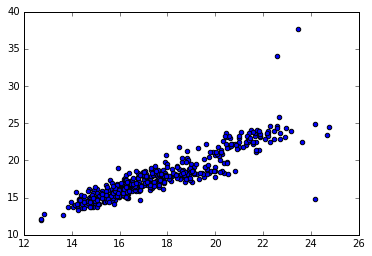

In [71]:
plt.scatter(cross_model[1].predict(Xtest),Ytest)
